**Logistic Regression Intuition**  
* We covered Linear Regression which predicted numerical values.  
* Logistic regression is for classification.  
* Example below shows what it would look like if we applied linear regression to categorical data.


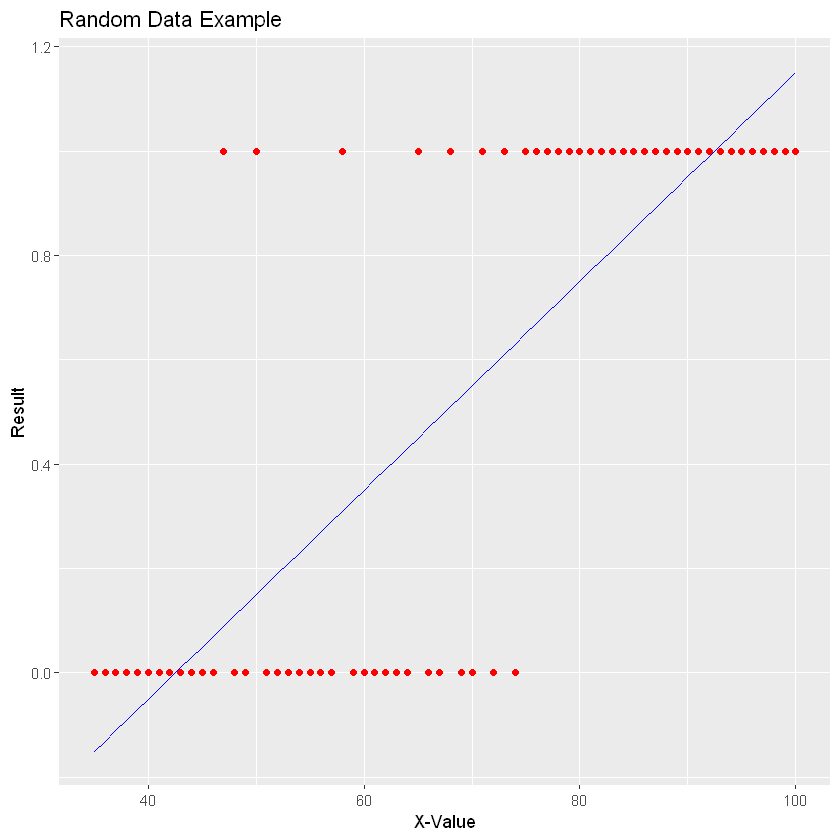

In [2]:
data.sample <- read.csv('sample.csv')

library(ggplot2)

regressor <- lm(formula = Result ~ Age,
                data = data.sample)

ggplot() + geom_point(aes(x = data.sample$Age, y = data.sample$Result),
                      color = 'red') + 
  geom_line(aes(x = data.sample$Age, y =  predict(regressor, data.sample)), color = 'blue') + 
  ggtitle('Random Data Example') + 
  xlab('X-Value') +
  ylab('Result')

**Cap predictions at 1 and floor at 0**  
* Result is beginning to look like logistic regression.  

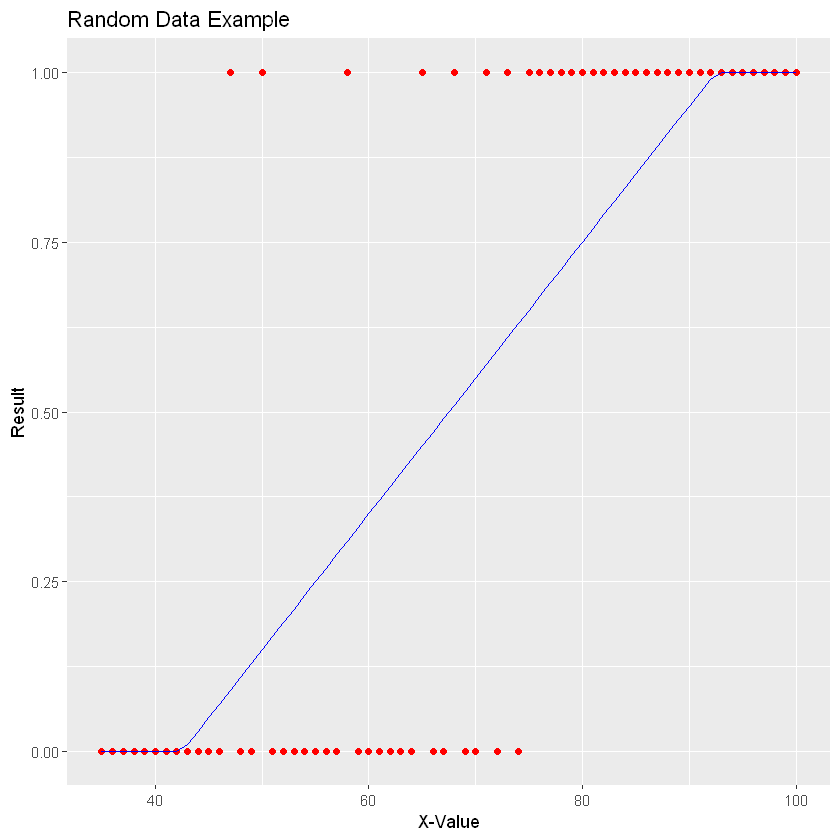

In [5]:
data.sample <- read.csv('sample.csv')

library(ggplot2)

regressor <- lm(formula = Result ~ Age,
                data = data.sample)

ggplot() + geom_point(aes(x = data.sample$Age, y = data.sample$Result),
                      color = 'red') + 
  geom_line(aes(x = data.sample$Age, y =  ifelse(predict(regressor, data.sample) <0,0,
                                                ifelse(predict(regressor, data.sample) >1 ,1,
                                                predict(regressor, data.sample)))),color = 'blue') + 
  ggtitle('Random Data Example') + 
  xlab('X-Value') +
  ylab('Result')

**START WITH LINEAR REGRESSION**   
y = b0 + b1x1

**APPLY SIGMOID FUNCTION**  
p = (1/(1 + e^(-y)))

**SOLVE FOR Y**  
ln(p/1-p) = b0 + b1x  

* Above equation is the equation for logistic regression.  
* Gives the curved shape we expect.

**What can we do with the resulting equation?**  
* We can calculate predicted probabilities (p-hat).  
* Can choose a threshold probability to map to 0 or 1.  

**Graph Below:**  
* Background colors reflect prediction regions.  Red = predicted no sale ; Green = predicted Sale  
* Dot Colors reflect actual data points.  Red = No Sale ; Green = Actual Sale  
* Prediction Boundary:  Separates 2 zones ; Linear (function of logistic regression classifier is linear)  
* Later we will look at non-linear classifiers where Prediction Boundary does not need to be linear  

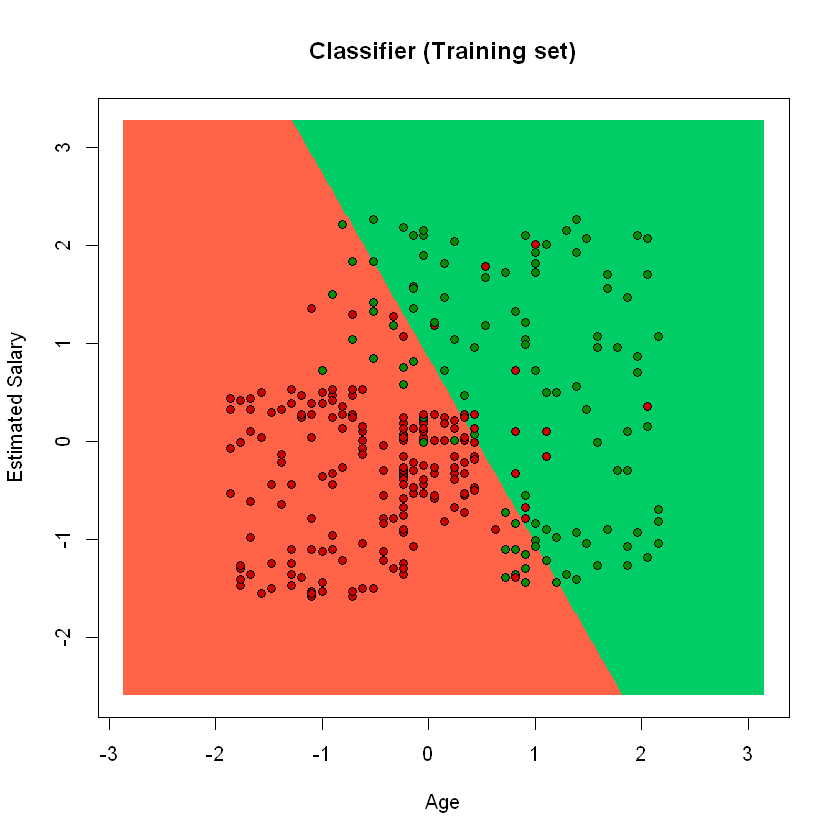

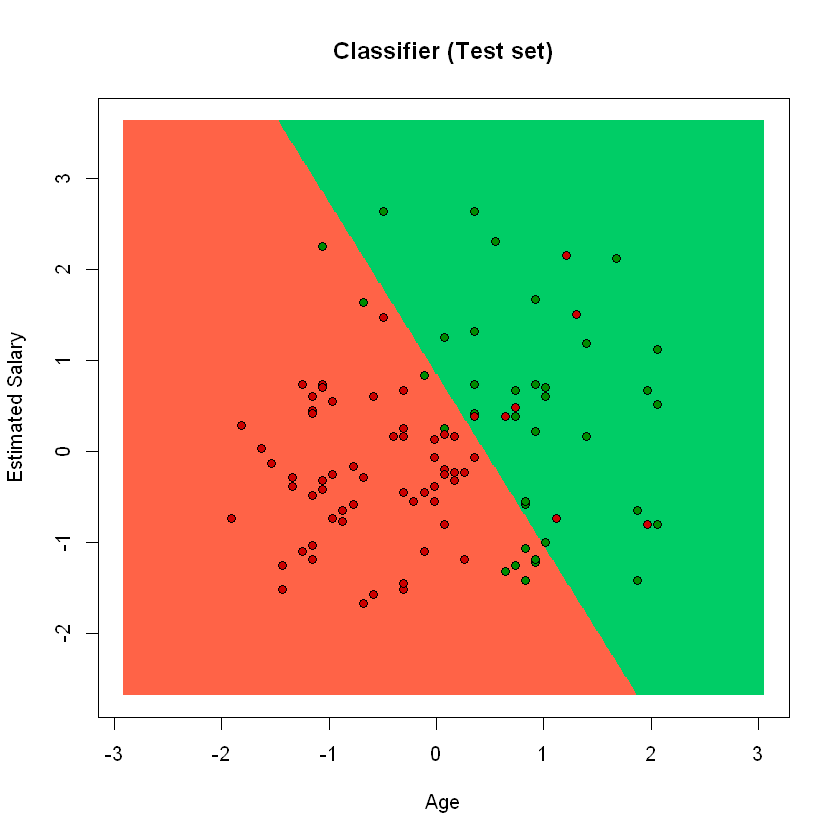

In [16]:
# Classification template

# Importing the dataset
dataset = read.csv('Social_Network_Ads.csv')
dataset = dataset[3:5]

# Encoding the target feature as factor
dataset$Purchased = factor(dataset$Purchased, levels = c(0, 1))

# Splitting the dataset into the Training set and Test set
# install.packages('caTools')
library(caTools)
set.seed(123)
split = sample.split(dataset$Purchased, SplitRatio = 0.75)
training_set = subset(dataset, split == TRUE)
test_set = subset(dataset, split == FALSE)

# Feature Scaling
training_set[-3] = scale(training_set[-3])
test_set[-3] = scale(test_set[-3])

# Fitting classifier to the Training set
classifier = glm(formula = Purchased ~ .,
                family = binomial,
                data = training_set)

# Prediction Probabilities
prob_pred <- predict(classifier,
                    type = 'response',
                    newdata = test_set[-3])

# Classified Predictions
y_pred = ifelse(prob_pred > 0.5,1,0)

# Making the Confusion Matrix
cm = table(test_set[, 3], y_pred)

# Visualising the Training set results
library(ElemStatLearn)
set = training_set
X1 = seq(min(set[, 1]) - 1, max(set[, 1]) + 1, by = 0.01)
X2 = seq(min(set[, 2]) - 1, max(set[, 2]) + 1, by = 0.01)
grid_set = expand.grid(X1, X2)
colnames(grid_set) = c('Age', 'EstimatedSalary')
prob_set = predict(classifier, type = 'response', newdata = grid_set)
y_grid = ifelse(prob_set > 0.5,1,0)
plot(set[, -3],
     main = 'Classifier (Training set)',
     xlab = 'Age', ylab = 'Estimated Salary',
     xlim = range(X1), ylim = range(X2))
contour(X1, X2, matrix(as.numeric(y_grid), length(X1), length(X2)), add = TRUE)
points(grid_set, pch = '.', col = ifelse(y_grid == 1, 'springgreen3', 'tomato'))
points(set, pch = 21, bg = ifelse(set[, 3] == 1, 'green4', 'red3'))

# Visualising the Test set results
library(ElemStatLearn)
set = test_set
X1 = seq(min(set[, 1]) - 1, max(set[, 1]) + 1, by = 0.01)
X2 = seq(min(set[, 2]) - 1, max(set[, 2]) + 1, by = 0.01)
grid_set = expand.grid(X1, X2)
colnames(grid_set) = c('Age', 'EstimatedSalary')
prob_set = predict(classifier, type = 'response', newdata = grid_set)
y_grid = ifelse(prob_set > 0.5,1,0)
plot(set[, -3], main = 'Classifier (Test set)',
     xlab = 'Age', ylab = 'Estimated Salary',
     xlim = range(X1), ylim = range(X2))
contour(X1, X2, matrix(as.numeric(y_grid), length(X1), length(X2)), add = TRUE)
points(grid_set, pch = '.', col = ifelse(y_grid == 1, 'springgreen3', 'tomato'))
points(set, pch = 21, bg = ifelse(set[, 3] == 1, 'green4', 'red3'))

**Confusion Matrix**

In [17]:
cm

   y_pred
     0  1
  0 57  7
  1 10 26